# Step 7: Optimization

Exploring different techniques to optimize the weights and biases in the network to minimize loss.

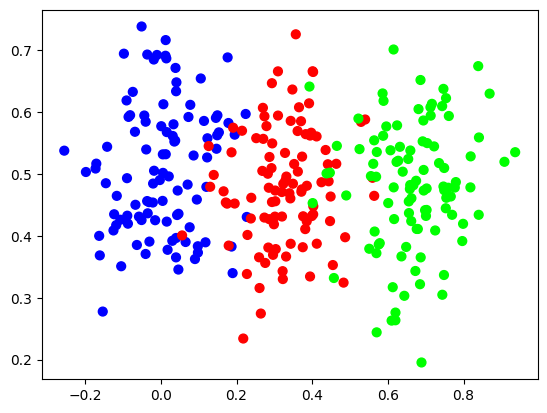

In [1]:
# starting with a simpler dataset
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [2]:
# grabbing the class definitions from previous lectures
import numpy as np
class DenseLayer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class ActivationReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class ActivationSoftmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        row_sums = np.sum(exp_values, axis=1, keepdims=True)
        self.output = exp_values / row_sums

class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class CategoricalCrossEntropyLoss(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # means the targets are just numbers
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped*y_true,
                axis=1
            )
        
        neg_logs = -np.log(correct_confidences)
        return neg_logs

Strategy 1: Randomly picking weights and biases to try and minimize loss (doesn't really work)

In [3]:
# creating model
dense1 = DenseLayer(2, 3)
activation1 = ActivationReLU()
dense2 = DenseLayer(3, 3)
activation2 = ActivationSoftmax()
loss_func = CategoricalCrossEntropyLoss()

# helper vars
lowest_loss = 99999999 #initialize to random value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
    # generate new weights
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)

    # forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # calculate loss and accuracy
    loss = loss_func.calculate(activation2.output, y)
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)

    # update the best weights if necessary
    if loss < lowest_loss:
        print(f'New set of weights found, iteration: {iteration}, loss: {loss}, acc: {accuracy}')
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration: 0, loss: 1.098656415939331, acc: 0.3333333333333333
New set of weights found, iteration: 3, loss: 1.0981379747390747, acc: 0.3333333333333333
New set of weights found, iteration: 117, loss: 1.0980114936828613, acc: 0.3333333333333333
New set of weights found, iteration: 124, loss: 1.0977516174316406, acc: 0.6
New set of weights found, iteration: 165, loss: 1.0975711345672607, acc: 0.3333333333333333
New set of weights found, iteration: 552, loss: 1.0974693298339844, acc: 0.34
New set of weights found, iteration: 778, loss: 1.0968257188796997, acc: 0.3333333333333333
New set of weights found, iteration: 4307, loss: 1.0965533256530762, acc: 0.3333333333333333
New set of weights found, iteration: 4615, loss: 1.096449851989746, acc: 0.3333333333333333
New set of weights found, iteration: 9450, loss: 1.096429467201233, acc: 0.3333333333333333
New set of weights found, iteration: 13361, loss: 1.0963014364242554, acc: 0.3333333333333333
New set of weights 

Strategy 2: Adjust the weights and biases based on whether they actually make the loss decrease (works slightly better, but will eventually struggle in complex network architectures)

In [4]:
# creating model
dense1 = DenseLayer(2, 3)
activation1 = ActivationReLU()
dense2 = DenseLayer(3, 3)
activation2 = ActivationSoftmax()
loss_func = CategoricalCrossEntropyLoss()

# helper vars
lowest_loss = 99999999 #initialize to random value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
    # slightly randomly adjust weight and bias values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # calculate loss and accuracy
    loss = loss_func.calculate(activation2.output, y)
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)

    if loss < lowest_loss:
        print(f'New set of weights found, iteration: {iteration}, loss: {loss}, acc: {accuracy}')
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        # reverts weights and biases back to what they were previously
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0, loss: 1.0986452102661133, acc: 0.3333333333333333
New set of weights found, iteration: 10, loss: 1.0981879234313965, acc: 0.3333333333333333
New set of weights found, iteration: 19, loss: 1.0978997945785522, acc: 0.3333333333333333
New set of weights found, iteration: 26, loss: 1.097573161125183, acc: 0.3333333333333333
New set of weights found, iteration: 30, loss: 1.096458077430725, acc: 0.3333333333333333
New set of weights found, iteration: 32, loss: 1.0944541692733765, acc: 0.3333333333333333
New set of weights found, iteration: 36, loss: 1.0922532081604004, acc: 0.3433333333333333
New set of weights found, iteration: 38, loss: 1.0916231870651245, acc: 0.5
New set of weights found, iteration: 40, loss: 1.0870226621627808, acc: 0.6466666666666666
New set of weights found, iteration: 43, loss: 1.085837960243225, acc: 0.66
New set of weights found, iteration: 49, loss: 1.0815478563308716, acc: 0.3333333333333333
New set of weights found, iterat

This works for the simple vertical dataset, but if we try with a more complex dataset, it doesn't fare as well

In [5]:
from nnfs.datasets import spiral_data
X, y = spiral_data(samples=100, classes=3)

# creating model
dense1 = DenseLayer(2, 3)
activation1 = ActivationReLU()
dense2 = DenseLayer(3, 3)
activation2 = ActivationSoftmax()
loss_func = CategoricalCrossEntropyLoss()

# helper vars
lowest_loss = 99999999 #initialize to random value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
    # slightly randomly adjust weight and bias values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # calculate loss and accuracy
    loss = loss_func.calculate(activation2.output, y)
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)

    if loss < lowest_loss:
        print(f'New set of weights found, iteration: {iteration}, loss: {loss}, acc: {accuracy}')
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        # reverts weights and biases back to what they were previously
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0, loss: 1.099014163017273, acc: 0.3333333333333333
New set of weights found, iteration: 7, loss: 1.098939299583435, acc: 0.3333333333333333
New set of weights found, iteration: 12, loss: 1.0985444784164429, acc: 0.3333333333333333
New set of weights found, iteration: 17, loss: 1.0984808206558228, acc: 0.3466666666666667
New set of weights found, iteration: 23, loss: 1.0976009368896484, acc: 0.42
New set of weights found, iteration: 26, loss: 1.0962408781051636, acc: 0.3933333333333333
New set of weights found, iteration: 27, loss: 1.0959527492523193, acc: 0.4066666666666667
New set of weights found, iteration: 29, loss: 1.09587562084198, acc: 0.42333333333333334
New set of weights found, iteration: 30, loss: 1.0951299667358398, acc: 0.3933333333333333
New set of weights found, iteration: 47, loss: 1.0948768854141235, acc: 0.3466666666666667
New set of weights found, iteration: 50, loss: 1.0938689708709717, acc: 0.33
New set of weights found, iterat

Our method #2 updates the weights randomly, but to properly have a robust algorithm, we need to update the weights according to the slope (gradient) of the function.